<a href="https://colab.research.google.com/github/ulisacosta/netflix_data_history/blob/main/Netflix_user_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importamos nuestras librerias y datos desde nuestros csv

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install rapidfuzz
from rapidfuzz import process,fuzz

''' Ingresamos la ruta del csv de nuestro historial de Netflix'''
netflix_history = pd.read_csv("/content/NetflixViewingHistory.csv")

''' Ingresamos la ruta del csv de la data de Netlfix '''
netflix_data = pd.read_csv("/content/netflix_data.csv")

In [4]:
netflix_data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


Buscamos titulos duplicados

In [5]:
 netflix_data['title'].duplicated().sum()

3

Limpiamos duplicados y columnas que no vamos a utilizar

In [6]:
netflix_data.drop_duplicates(subset=["title"],inplace=True)
netflix_data = netflix_data.drop(columns=["show_id","type","director","country","date_added","release_year","rating","duration"])


#Separamos los generos ya que cada serie o pelicula puede tener mas de uno.

In [7]:
netflix_data["listed_in"] = netflix_data['listed_in'].str.split(", ")
netflix_data = netflix_data.explode('listed_in')
netflix_data

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Ganglands,Crime TV Shows
1,Ganglands,International TV Shows
1,Ganglands,TV Action & Adventure
2,Midnight Mass,TV Dramas
...,...,...
8787,Zindagi Gulzar Hai,International TV Shows
8787,Zindagi Gulzar Hai,Romantic TV Shows
8787,Zindagi Gulzar Hai,TV Dramas
8788,Yoko,Kids' TV


#Dejamos los nombres originales de los titulos que tienen el nombre del capitulo
Como vemos en nuestro historial de netflix en caso de que sea una serie tambien nos muestra el nombre del capitulo asi que separamos el nombre de los capitulos dejando solo el titulo origina

In [8]:
netflix_history["title_clean"] = netflix_history['Title'].str.split(":").str[0].str.strip()
netflix_history = netflix_history.drop(columns=["Title","Date"])
netflix_history

,title_clean
0,Death Before the Wedding
1,Ready or Not
2,The Platform 2
3,Time Trap
4,Breaking Bad
...,...
1353,The Haunting of Hill House
1354,The Haunting of Hill House
1355,Toy Story 3
1356,Boca Juniors Confidential


Limpiamos las columnas de titulo y fecha ya que no vamos a utilizar, y limpiamos los titulos duplicados

In [9]:
netflix_history.drop_duplicates(subset="title_clean",inplace=True)
netflix_history

,title_clean
0,Death Before the Wedding
1,Ready or Not
2,The Platform 2
3,Time Trap
4,Breaking Bad
...,...
1337,Errementari
1343,The Haunting of Hill House
1352,Central Intelligence
1355,Toy Story 3


#Combinamos las dos tablas

In [10]:
history_data_merge = netflix_history.merge(netflix_data,left_on="title_clean",right_on="title",how="left")
history_data_merge = history_data_merge.drop(columns="title")
history_data_merge

,title_clean,listed_in
0,Death Before the Wedding,NaN
1,Ready or Not,NaN
2,The Platform 2,NaN
3,Time Trap,Action & Adventure
4,Time Trap,Sci-Fi & Fantasy
...,...,...
518,Central Intelligence,NaN
519,Toy Story 3,NaN
520,Boca Juniors Confidential,Docuseries
521,Boca Juniors Confidential,International TV Shows


#Eliminamos los valores nulos


In [11]:
history_data_merge = history_data_merge.dropna(subset=["listed_in"])
history_data_merge

,title_clean,listed_in
3,Time Trap,Action & Adventure
4,Time Trap,Sci-Fi & Fantasy
5,Breaking Bad,Crime TV Shows
6,Breaking Bad,TV Dramas
7,Breaking Bad,TV Thrillers
...,...,...
516,The Haunting of Hill House,TV Horror
517,The Haunting of Hill House,TV Mysteries
520,Boca Juniors Confidential,Docuseries
521,Boca Juniors Confidential,International TV Shows


In [12]:
genero_counts = history_data_merge["listed_in"].value_counts()

#Generamos el grafico para ver que genero miramos más

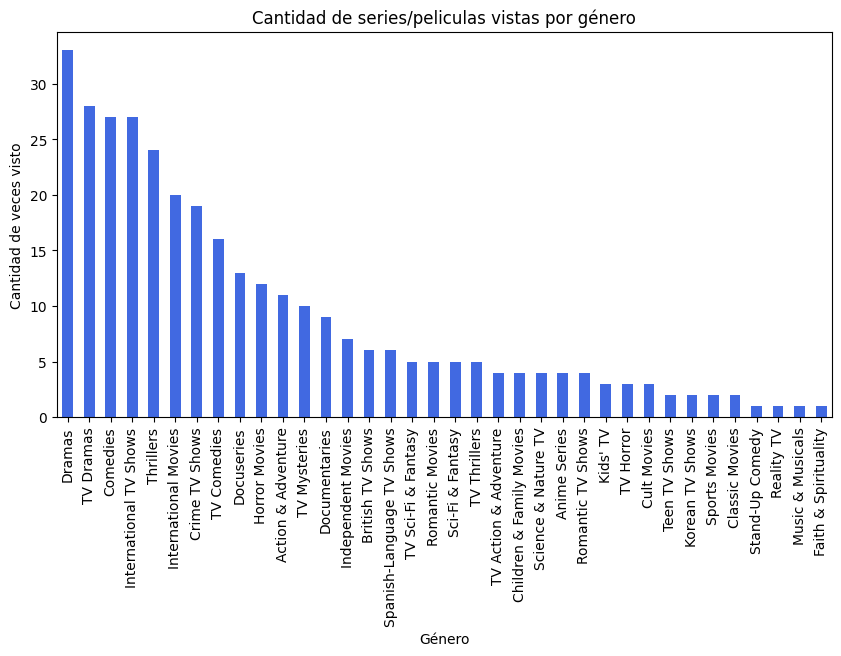

In [13]:
genero_counts.plot(kind="bar", figsize=(10,5), color='royalblue')
plt.xlabel("Género")
plt.ylabel("Cantidad de veces visto")
plt.title("Cantidad de series/peliculas vistas por género")
plt.xticks(rotation=90)
plt.show()